# Cifar-100 이미지 분류

## 전체 데이터중 일부분만 사용

### 모델 출처: Divya Agarwal

#### CIFAR100 데이터 로드

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 25s 0us/step


In [2]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

#### 데이터 확인

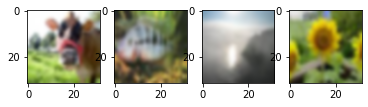

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [13]:
CIFAR100_LABELS_LIST(y_train[0]), CIFAR100_LABELS_LIST(y_train[4]), CIFAR100_LABELS_LIST(y_train[8]), CIFAR100_LABELS_LIST(y_train[12])

NameError: name 'CIFAR100_LABELS_LIST' is not defined

#### 자료형 변환 및 스케일링


- X: 실수형으로 정규화
- Y: 1-hot encoding

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### 자료의 일부만 사용하여 모델 테스트 하기

In [8]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, 
                                                    test_size=.2, random_state=seed)

#### 모형 구현

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Activation
import numpy as np

np.random.seed(0)

In [10]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [11]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50,
                    validation_data=(X_test, Y_test), verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 7s 930us/sample - loss: 4.6036 - accuracy: 0.0124 - val_loss: 4.5861 - val_accuracy: 0.0190
Epoch 2/100
8000/8000 [==============================] - 7s 847us/sample - loss: 4.5303 - accuracy: 0.0234 - val_loss: 4.4106 - val_accuracy: 0.0510
Epoch 3/100
8000/8000 [==============================] - 7s 864us/sample - loss: 4.3906 - accuracy: 0.0342 - val_loss: 4.2916 - val_accuracy: 0.0480
Epoch 4/100
8000/8000 [==============================] - 7s 873us/sample - loss: 4.2896 - accuracy: 0.0440 - val_loss: 4.1646 - val_accuracy: 0.0675
Epoch 5/100
8000/8000 [==============================] - 7s 861us/sample - loss: 4.1927 - accuracy: 0.0650 - val_loss: 4.0377 - val_accuracy: 0.1005
Epoch 6/100
8000/8000 [==============================] - 7s 869us/sample - loss: 4.0771 - accuracy: 0.0793 - val_loss: 3.9431 - val_accuracy: 0.1300
Epoch 7/100
8000/8000 [==============================] - 7

8000/8000 [==============================] - 7s 844us/sample - loss: 2.1732 - accuracy: 0.4245 - val_loss: 3.0278 - val_accuracy: 0.2830
Epoch 56/100
8000/8000 [==============================] - 7s 843us/sample - loss: 2.1531 - accuracy: 0.4309 - val_loss: 3.0124 - val_accuracy: 0.2810
Epoch 57/100
8000/8000 [==============================] - 7s 847us/sample - loss: 2.1428 - accuracy: 0.4338 - val_loss: 2.9996 - val_accuracy: 0.2800
Epoch 58/100
8000/8000 [==============================] - 7s 845us/sample - loss: 2.1037 - accuracy: 0.4345 - val_loss: 3.0272 - val_accuracy: 0.2875
Epoch 59/100
8000/8000 [==============================] - 7s 845us/sample - loss: 2.0756 - accuracy: 0.4465 - val_loss: 3.0008 - val_accuracy: 0.2840
Epoch 60/100
8000/8000 [==============================] - 7s 849us/sample - loss: 2.0454 - accuracy: 0.4489 - val_loss: 3.0070 - val_accuracy: 0.2890
Epoch 61/100
8000/8000 [==============================] - 7s 848us/sample - loss: 2.0239 - accuracy: 0.4604 - val

In [14]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2000/2000 [==============================] - 0s 224us/sample - loss: 3.2216 - accuracy: 0.3005

 Test Accuracy: 0.3005


In [15]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

KeyError: 'val_acc'

In [ ]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()